In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd

/root


In [2]:
cd /content/drive/My Drive/H

/content/drive/My Drive/H


In [0]:
from keras.datasets import mnist
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Conv2D,AveragePooling2D,MaxPooling2D,Flatten,UpSampling2D,Conv2DTranspose,Input,BatchNormalization
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import natsort

In [12]:
folder="/content/drive/My Drive/otsi/haze"
k=natsort.natsorted(os.listdir(folder))
l= [f for f in k if os.path.isfile(os.path.join(folder, f))]
l=np.array(l)
print(len(l))
print(l[0])


1665
0025.jpg


TypeError: ignored

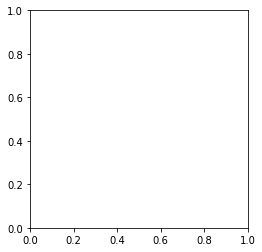

In [10]:
plt.imshow(l[584])
plt.show()

In [0]:
pickle_in=open("X1_n.pickle","rb")
q= pickle.load(pickle_in)
print(q.shape)
print(q[0])

(400, 512, 512, 3)
[[[0.52941176 0.51764706 0.50196078]
  [0.52941176 0.51764706 0.50196078]
  [0.52941176 0.51764706 0.50196078]
  ...
  [0.61568627 0.7254902  0.41176471]
  [0.62352941 0.72941176 0.41960784]
  [0.62745098 0.72941176 0.42352941]]

 [[0.52941176 0.51764706 0.50196078]
  [0.52941176 0.51764706 0.50196078]
  [0.52941176 0.51764706 0.50196078]
  ...
  [0.61568627 0.72941176 0.41960784]
  [0.62352941 0.73333333 0.42745098]
  [0.63137255 0.7372549  0.42745098]]

 [[0.52941176 0.51764706 0.50196078]
  [0.52941176 0.51764706 0.50196078]
  [0.52941176 0.51764706 0.50196078]
  ...
  [0.61960784 0.73333333 0.41960784]
  [0.62352941 0.7372549  0.42745098]
  [0.63529412 0.74117647 0.43137255]]

 ...

 [[0.32156863 0.33333333 0.32156863]
  [0.32156863 0.33333333 0.32156863]
  [0.32156863 0.33333333 0.32156863]
  ...
  [0.43529412 0.41960784 0.39607843]
  [0.43529412 0.41960784 0.4       ]
  [0.43921569 0.41568627 0.40392157]]

 [[0.32156863 0.33333333 0.3254902 ]
  [0.32156863 0.33

In [0]:
pickle_in=open("Y1_n.pickle","rb")
p= pickle.load(pickle_in)
print(p.shape)
print(p[0])

(400, 512, 512, 3)
[[[0.34901961 0.32941176 0.30588235]
  [0.34901961 0.32941176 0.30588235]
  [0.34901961 0.32941176 0.30588235]
  ...
  [0.56078431 0.69019608 0.30980392]
  [0.56862745 0.69803922 0.31764706]
  [0.57254902 0.69803922 0.3254902 ]]

 [[0.34901961 0.32941176 0.30588235]
  [0.34901961 0.32941176 0.30588235]
  [0.34901961 0.32941176 0.30588235]
  ...
  [0.56078431 0.69803922 0.31764706]
  [0.56862745 0.70196078 0.3254902 ]
  [0.57647059 0.70588235 0.33333333]]

 [[0.34901961 0.32941176 0.30588235]
  [0.34901961 0.32941176 0.30588235]
  [0.34901961 0.32941176 0.30980392]
  ...
  [0.56078431 0.70196078 0.32156863]
  [0.56862745 0.70588235 0.32941176]
  [0.58039216 0.70980392 0.3372549 ]]

 ...

 [[0.04705882 0.06666667 0.04705882]
  [0.04705882 0.06666667 0.04705882]
  [0.04705882 0.06666667 0.04705882]
  ...
  [0.34117647 0.3254902  0.29411765]
  [0.34509804 0.3254902  0.30196078]
  [0.34901961 0.32156863 0.30588235]]

 [[0.04705882 0.0627451  0.05098039]
  [0.04705882 0.06

In [0]:
pickle_in = open("X_n.pickle","rb")
X = pickle.load(pickle_in)
print(X.shape)
pickle_in=open("Y_n.pickle","rb")
Y = pickle.load(pickle_in)
print(Y.shape)

(70, 512, 512, 3)
(70, 512, 512, 3)


In [0]:
inputs = Input(shape=(512, 512, 3))

x=Conv2D(50,(3,3),activation='relu',strides=1,padding='same')(inputs)
print(x.shape)
#x=AveragePooling2D((2,2))(x)
#print(x.shape)

x=Conv2D(50,(3,3),activation='relu',strides=1,padding='same')(x)
print(x.shape)
x=AveragePooling2D((2,2))(x)
print(x.shape)


x=Dense(10,activation='relu')(x)
x=Dense(10,activation='relu')(x)
x=Dense(10,activation='relu')(x)


x=Conv2DTranspose(50,(3,3),activation='relu',strides=1,padding='same')(x)
print(x.shape)
x=UpSampling2D((2,2))(x)
print(x.shape)

x=Conv2DTranspose(50,(3,3),activation='relu',strides=1,padding='same')(x)
print(x.shape)
#x=UpSampling2D((2,2))(x)
#print(x.shape)



x=Conv2DTranspose(3,(3,3),activation='linear',strides=1,padding='same')(x)
print(x.shape)


autoencoder = Model(inputs, x)
autoencoder.compile( loss="mean_squared_logarithmic_error",optimizer='adam',metrics=['accuracy'])
print(autoencoder.summary())
autoencoder.fit(q, p ,batch_size=32,epochs=100,validation_split=0.01,verbose=1)

prediction=autoencoder.predict(X)
#yo=autoencoder.predict(X1)
#plt.imshow(prediction[0])
#plt.show()




W0701 06:50:03.186269 140614810761088 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


(?, 512, 512, 50)
(?, 512, 512, 50)
(?, 256, 256, 50)
(?, 256, 256, 50)
(?, 512, 512, 50)
(?, 512, 512, 50)
(?, 512, 512, 3)


W0701 06:50:04.020161 140614810761088 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 50)      1400      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 50)      22550     
_________________________________________________________________
average_pooling2d (AveragePo (None, 256, 256, 50)      0         
_________________________________________________________________
dense (Dense)                (None, 256, 256, 10)      510       
_________________________________________________________________
dense_1 (Dense)              (None, 256, 256, 10)      110       
_________________________________________________________________
dense_2 (Dense)              (None, 256, 256, 10)      110   

In [0]:
autoencoder=tf.keras.models.load_model("Model_1.model")

W0703 04:51:50.313666 140695406942080 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0703 04:51:50.315255 140695406942080 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0703 04:51:50.321522 140695406942080 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

W0703 04:52:36.578078 140695406942080 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


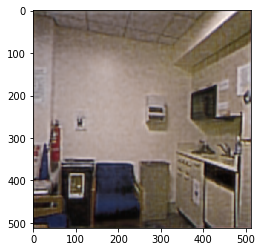

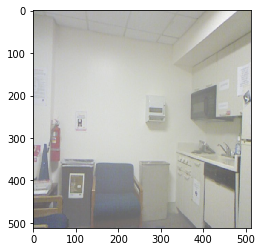

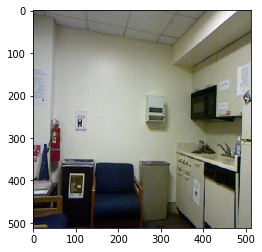

'\npredictions=predictions*255\ncv2.imwrite("im.png",prediction[0])\n'

In [0]:
prediction=autoencoder.predict(X)

plt.imshow(prediction[0])
plt.show()
plt.imshow(X[0])
plt.show()
plt.imshow(Y[0])
plt.show()

cv2.imwrite("image.jpg",prediction[0]*255)

'''
predictions=predictions*255
cv2.imwrite("im.png",prediction[0])
'''

W0701 06:25:55.339608 139722162689920 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


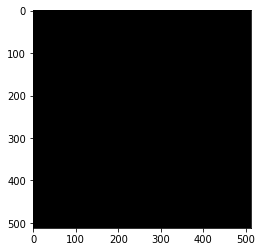

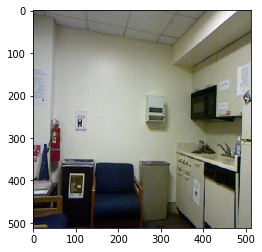

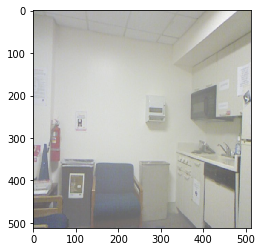

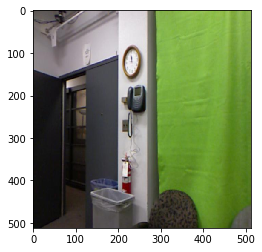

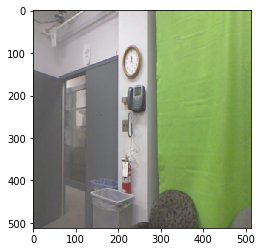

In [0]:
plt.imshow(prediction[0]*255)
plt.show()
plt.imshow(Y[0])
plt.show()
plt.imshow(X[0])
plt.show()
plt.imshow(p[0])
plt.show()
plt.imshow(q[0])
plt.show()




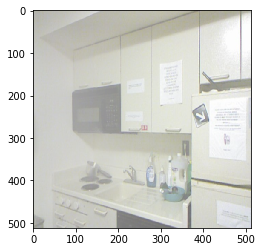

[[[135 132 128]
  [135 132 128]
  [135 132 128]
  ...
  [157 185 105]
  [159 186 107]
  [160 186 108]]

 [[135 132 128]
  [135 132 128]
  [135 132 128]
  ...
  [157 186 107]
  [159 187 109]
  [161 188 109]]

 [[135 132 128]
  [135 132 128]
  [135 132 128]
  ...
  [158 187 107]
  [159 188 109]
  [162 189 110]]

 ...

 [[ 82  85  82]
  [ 82  85  82]
  [ 82  85  82]
  ...
  [111 107 101]
  [111 107 102]
  [112 106 103]]

 [[ 82  85  83]
  [ 82  85  83]
  [ 82  85  83]
  ...
  [110 106 100]
  [111 106 101]
  [111 106 101]]

 [[ 82  84  83]
  [ 82  85  83]
  [ 83  85  83]
  ...
  [110 106  98]
  [109 106  99]
  [110 105  99]]]


In [0]:
plt.imshow(X[10])
plt.show()
print(X1[0])

In [0]:
autoencoder.save("Model_1.model")

In [0]:
X1_n=autoencoder.predict(q)

In [0]:
print(prediction[0]*255)
print(X[0])
print(Y[0])

[[[ 0.2195518   0.439676    0.5389473 ]
  [ 0.57361627  0.8421558   0.4975758 ]
  [ 0.57533973  0.84972537  0.5307622 ]
  ...
  [ 0.95996636  1.2889389   0.08166969]
  [ 0.96931124  1.3683021  -0.2325707 ]
  [ 0.43727437  0.922539    0.24267389]]

 [[-0.19665575  0.37843713  0.4246495 ]
  [ 0.17594866  0.45414138  0.33262983]
  [ 0.3124276   0.41150048  0.44157156]
  ...
  [ 1.0863773   0.13866545  0.5394962 ]
  [ 0.77427685  0.34685284  0.18454102]
  [ 0.14385417  0.34699652  0.5134389 ]]

 [[-0.11025681  0.27081746  0.23943433]
  [ 0.32716376  0.525237    0.03063637]
  [ 0.5973725   0.5020125   0.10296204]
  ...
  [ 1.369333    0.08566793 -0.27686802]
  [ 1.0730561   0.35668403 -0.68411094]
  [ 0.5382785   0.39022723 -0.07044038]]

 ...

 [[-0.3008735   0.08167207  0.31610987]
  [ 0.05439871  0.6804477  -0.04173901]
  [ 0.32686916  0.57907534  0.14453545]
  ...
  [ 0.544808    0.07171872  0.8066327 ]
  [ 0.1906524   0.6496135   0.9187914 ]
  [ 0.03428146  0.44411954  0.20327888]]

 [